<a href="https://colab.research.google.com/github/Laluprasad1/AIML-2025/blob/main/Lab10_AIML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Lab10-AIML: Implementing K-Means Clustering using Synthetic Data from Bloobs**<br>Lalu prasad Aroori - 2303A51948

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() #plot styling
import numpy as np

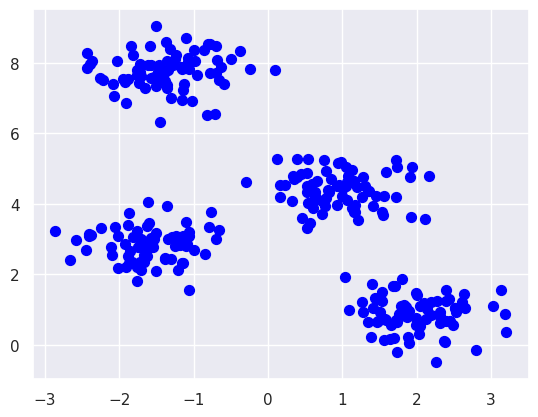

In [17]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.50, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50,color='blue');

**Import K-Means from Sklearn and Fit the data**

In [22]:
type(X)

numpy.ndarray

In [23]:
X.shape

(300, 2)

In [24]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, n_init=10)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(y_kmeans, y_true)

1.0

**Visualize the fitted data by coloring the blobs by assigned label numbers**

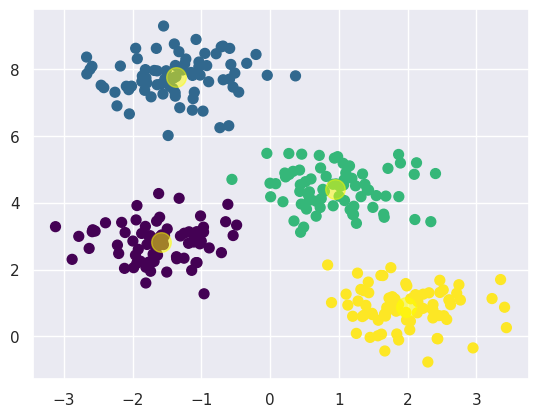

In [9]:
plt.scatter(X[:, 0], X[:, 1], c=y_Kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='yellow', s=200, alpha=0.5);

**Implement K-Means Algorithm from Scratch and Compare it with Expectation-Maximization(EM) Algorithm**

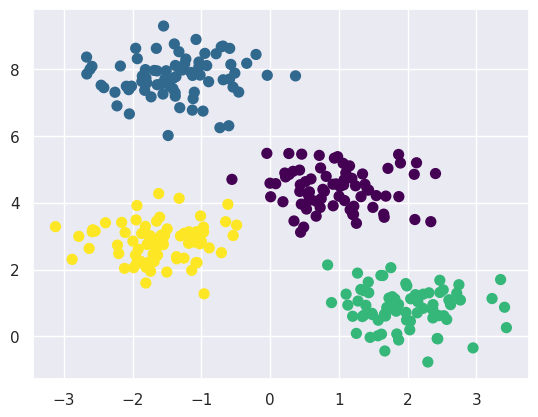

In [10]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]

    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)

        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])

        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers

    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');


**Bad Optimization of Sub-Optimal Clustering**

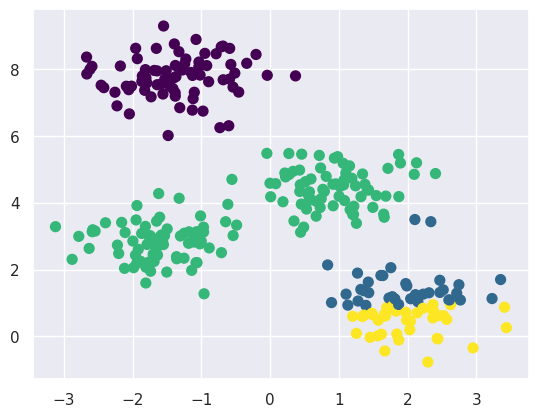

In [11]:
centers, labels = find_clusters(X, 4, rseed=0)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

**How many number of clusters**

plot the clusters formed using

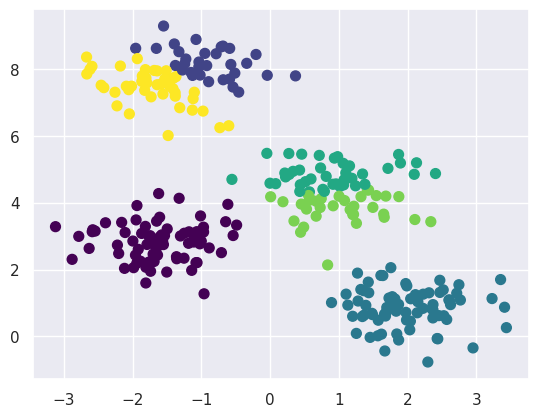

In [12]:
labels = KMeans(6, random_state=0, n_init=10).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

In [20]:
accuracy_score(labels, y_true)

0.0

**Limitations of K -Means Algorithm**


In [25]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.03, random_state=0)

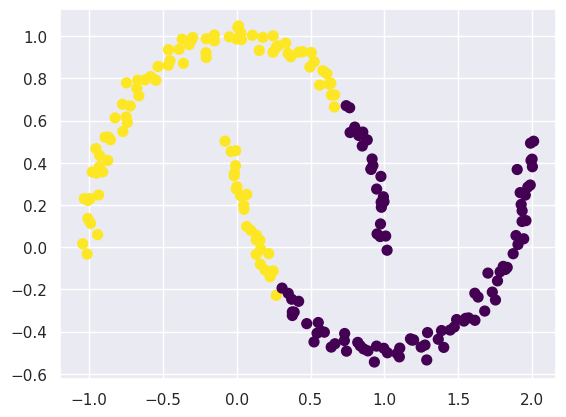

In [26]:
labels = KMeans(2, random_state=0, n_init=10).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

In [27]:
accuracy_score(labels, y)

0.245

**Kernal Transformation**

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


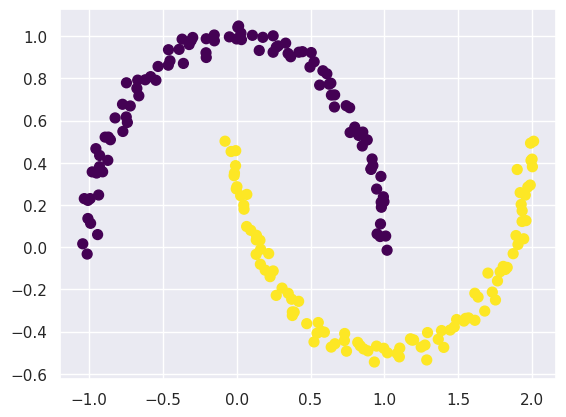

In [28]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:,0],X[:,1],c=labels,s=50,cmap='viridis');

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(labels, y)

1.0

**Limitations of KMeans Cluster**

In [30]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.7, random_state=0)
X = X[:, ::-1] # flip axes for better plotting

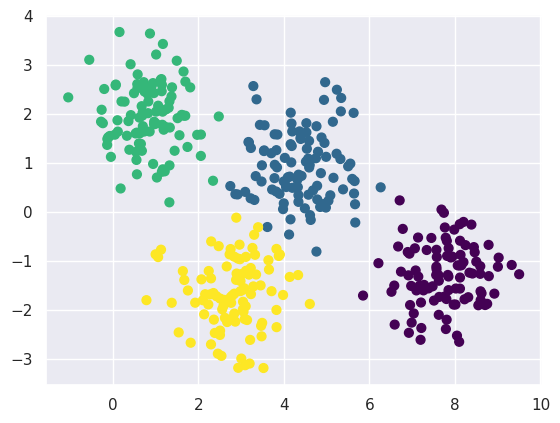

In [31]:
from sklearn.cluster import KMeans
kmeans = KMeans(4, random_state=0, n_init=10)
labels = kmeans.fit(X).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');